In [1]:
import os, os.path
import numpy as np
from time import time
import pandas as pd
import math as m
import setup_runs as sr
import importlib
import matplotlib.pyplot as plt
import itertools

In [198]:
##  MERGE IN ANALYTICA RUNS FOR SELECT SECTORS

arch_name = "Chile_sector_package_2021_02_20_design_id-1"
df_an_arch = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_name)
df_an_new = pd.read_csv(sr.fp_csv_output_multi_sector_analytica.replace(".csv", "_IPPU.csv"))

sectors_repl = ["ip-"]
fields_repl = [x for x in df_an_new.columns if (x[0:3] in sectors_repl)]
fields_merge = ["master_id", "year"]
#merge in new analytica runs
df_an_new_out = df_an_arch[[x for x in df_an_arch.columns if x not in fields_repl]]
df_an_new_out = pd.merge(df_an_new_out, df_an_new[fields_merge + fields_repl], how = "left", on = fields_merge)
#sort output columns
fields_sorted = [x for x in df_an_new_out.columns if (x not in fields_merge)]
fields_sorted.sort()

df_an_new_out = df_an_new_out[fields_merge + fields_sorted]
df_an_new_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")




In [113]:
##  MERGE PMR FILES

df_pmr_1 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_d1-1.csv"))
df_pmr_2 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_d1-2.csv"))
df_pmr_3 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_d1-3.csv"))
df_pmr_4 = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_d1-4.csv"))

df_pmr_2 = pd.concat([df_pmr_1, df_pmr_2[df_pmr_1.columns], df_pmr_3[df_pmr_1.columns], df_pmr_4[df_pmr_1.columns]], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)

df_pmr_2.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")



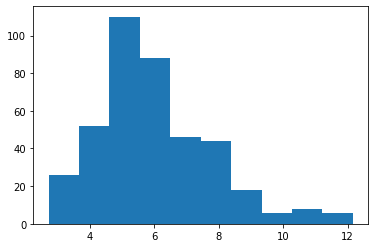

In [61]:
em = list(df_pmr_2[df_pmr_2["year"] == 2050]["el-emissions_total-mtco2e"])
plt.hist(em
plt.show()

In [21]:
arch0 = "Chile_sector_package_2021_01_30_design_id-0"
#get python outputs
df_py0 = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch0)

df_py0[(df_py0["year"] == 2050)&(df_py0["master_id"] == 0)][["master_id"] + [x for x in df_py0.columns if (x[0:3] == "tx-")]]


,master_id,tx-CAPEX-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_bus-MMUSD,tx-OPEX_transport_private-MMUSD,tx-OPEX_transport_taxi-MMUSD,...,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
35,0,17935.143936,0.0,15963.12519,2.293138,1969.725609,19896.92009,346.062867,10447.603526,73.208344,...,42328.383952,56768.867554,5.049488,0.0,1.203196,12.999993,0.0,21.552199,0.092806,2.206715


In [35]:

arch2 = "Chile_sector_package_2021_02_10_design_id-2"
arch3 = "Chile_sector_package_2021_02_10_design_id-3"
df_attribute_master_id = sr.get_archive_run(sr.fp_csv_attribute_master, arch)
#get python outputs
df_py2 = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch2)
df_py3 = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch3)
#get experimental design outputs
#df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch)
#bring in both designs and reduce to 0
#df_ed = df_ed[df_ed["design_id"] == 0]
#get analytica outputs
df_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch)


In [36]:
if False:
    dfe = df_ed[(df_ed["year"] == 2050) & (df_ed["design_id"] == 0) & (df_ed["strategy_id"] == 1) & (df_ed["time_series_id"] == 0)]
    lcheck = list(dfe["gr_pib"])
    plt.hist(lcheck)
    plt.show()
cols = [x for x in df_py2.columns if (x[0:3] == "tx-")]
df_py2[(df_py2["year"] == 2050)  & (df_py2["master_id"].isin([201, 203, 228, 399]))][["master_id"] + cols]



,master_id,tx-CAPEX-MMUSD,tx-CAPEX_transport_aviation-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_private_modal_change-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_aviation-MMUSD,...,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
7271,201,24713.402283,7286.716880,0.000000,15454.666657,0.0,2.293138,1969.725609,18230.914105,2021.053267,...,85257.131717,99697.615319,5.049488,0.0,1.203196,12.999993,0.0,21.552199,0.092806,2.206715
7343,203,23849.979655,8045.570272,0.000000,13899.706330,0.0,0.000000,1904.703052,18145.206222,1835.630735,...,90276.367770,108469.638812,5.142594,0.0,1.203196,13.161673,0.0,21.831238,0.084658,2.239117
8243,228,26571.792620,7981.933821,0.000000,16003.623304,0.0,24.351990,2561.883506,16267.258398,1664.928032,...,88935.998945,104957.969250,5.165514,0.0,1.203196,13.343983,0.0,22.088947,0.100597,2.275656
14399,399,27107.063547,8902.933495,33.580638,14372.858397,0.0,0.259269,3797.431748,18808.913623,2014.891065,...,91952.318554,110501.554737,5.588265,0.0,1.203196,13.705067,0.0,22.943518,0.095554,2.351435


In [37]:
df_py3[(df_py3["year"] == 2050)  & (df_py3["master_id"].isin([201, 203, 228, 399]))][["master_id"] + cols]

,master_id,tx-CAPEX-MMUSD,tx-CAPEX_transport_aviation-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_private_modal_change-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_aviation-MMUSD,...,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
7271,201,24713.402283,7286.716880,0.000000,15454.666657,0.0,2.293138,1969.725609,18230.914105,2021.053267,...,85257.131717,99697.615319,5.049488,0.0,1.203196,12.999993,0.0,21.552199,0.092806,2.206715
7343,203,23768.677732,8049.243916,0.000000,13899.706330,0.0,0.000000,1819.727485,17878.192512,1805.366727,...,86228.583904,104421.854945,5.142594,0.0,1.203196,13.161673,0.0,22.397309,0.084658,2.805189
8243,228,26226.905533,7871.419278,0.000000,16003.623304,0.0,24.351990,2327.510962,15745.265623,1553.266891,...,80673.113429,96695.083734,5.165514,0.0,1.203196,13.343983,0.0,23.268674,0.100597,3.455383
14399,399,24923.633011,8152.963407,33.580638,14372.858397,0.0,0.259269,2363.971299,16264.078682,1549.801076,...,56786.643727,75335.879910,5.588265,0.0,1.203196,13.705067,0.0,27.973384,0.095554,7.381301


In [41]:
df_py = pd.read_csv(sr.fp_csv_output_multi_sector)
cols = [x for x in df_py.columns if (x[0:3] == "tx-")]
df_py[(df_py["year"] == 2050)  & (df_py["master_id"].isin([201, 203, 228, 399]))][["master_id"] + cols]




,master_id,tx-CAPEX-MMUSD,tx-CAPEX_transport_aviation-MMUSD,tx-CAPEX_transport_bus-MMUSD,tx-CAPEX_transport_private-MMUSD,tx-CAPEX_transport_private_modal_change-MMUSD,tx-CAPEX_transport_taxi-MMUSD,tx-CAPEX_transport_truck-MMUSD,tx-OPEX-MMUSD,tx-OPEX_transport_aviation-MMUSD,...,tx-electricity_hydrogen-gwh,tx-electricity_total_demand-gwh,tx-emissions_aviation-mtco2e,tx-emissions_bus-mtco2e,tx-emissions_maritime-mtco2e,tx-emissions_private-mtco2e,tx-emissions_taxi-mtco2e,tx-emissions_total-mtco2e,tx-emissions_train-mtco2e,tx-emissions_truck-mtco2e
7271,201,12571.725579,822.898285,120.646254,9179.745097,476.417198,2.293138,1969.725609,16085.492600,1726.362605,...,85049.272025,97080.208290,4.545170,0.0,1.203196,10.243943,0.0,18.291830,0.092806,2.206715
7343,203,17425.671424,335.785577,53.260768,15309.990346,104.080077,2.875795,1619.678860,13923.537125,1445.985454,...,57871.613226,71684.604474,5.314292,0.0,1.203196,10.968200,0.0,23.600093,0.101806,6.012599
8243,228,15574.733768,546.702723,39.952675,13442.038782,94.886612,2.366096,1448.786879,13202.018444,1120.196153,...,50193.675043,58911.021564,4.750337,0.0,1.203196,17.906856,0.0,31.121716,0.087772,7.173556
14399,399,14124.079067,317.107583,16.436254,11973.249116,292.350929,0.000000,1524.935183,11456.175722,1104.965085,...,54874.870071,70135.659096,5.243552,0.0,1.203196,9.144411,0.0,21.388571,0.089692,5.707720


In [5]:
import importlib
import sector_model_transport as smt 

# Transportation correction for econometric model
df_tmp_correction_for_pib_peso_traj = pd.read_csv(sr.fp_csv_tmp_correction_for_pib_peso_traj)
#get baseline data from experimental design
df_tmp_correction_for_pib_peso_traj = pd.merge(df_tmp_correction_for_pib_peso_traj, df_ed[df_ed["master_id"] == 0][["year", "pib"]].copy(), how = "left", on = ["year"]).reset_index(drop = True)
#add scalar and string name
str_pib_scalar = "pib_scalar_transport"
df_tmp_correction_for_pib_peso_traj[str_pib_scalar] = np.array(df_tmp_correction_for_pib_peso_traj["pib_peso_luis_20201218"])/np.array(df_tmp_correction_for_pib_peso_traj["pib"])
df_tmp_correction_for_pib_peso_traj = df_tmp_correction_for_pib_peso_traj[["year", str_pib_scalar]]

exp_design = pd.merge(df_ed, df_tmp_correction_for_pib_peso_traj, how = "left", on = ["year"]).sort_values(by = ["master_id", "year"]).reset_index(drop = True)



In [7]:
importlib.reload(smt)

temp = smt.sm_transport(exp_design, {"transport": "tx"})

out2 = np.round(temp["transport_pkm_aviation"].copy(), 2)
#out3 = np.round(temp["transport_pkm_aviation"].copy(), 2)
sat = np.array(exp_design["transport_saturation_aviation"])


In [25]:
df_ed["transport_pkm_aviation"]

0        1.125243e+07
1        1.165476e+07
2        1.291461e+07
3        1.391305e+07
4        1.469566e+07
             ...     
43411    6.508414e+07
43412    6.806080e+07
43413    7.113009e+07
43414    7.427752e+07
43415    7.751087e+07
Name: transport_pkm_aviation, Length: 28944, dtype: float64

In [250]:
year = np.array(exp_design["year"])
gdp = np.array(exp_design["pib"])*np.array(exp_design["pib_scalar_transport"])
#plt.hist()
#plt.show()


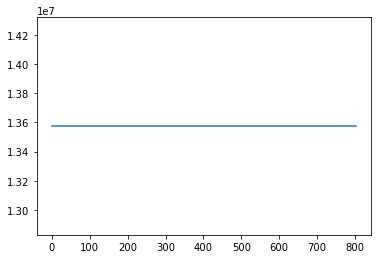

In [9]:
ms = np.array(range(0, 804))#np.array(exp_design[exp_design.iloc[[i*36-1 for i in range(1, int(n/36))]]])
y = np.array([out2[i*36 - 1] for i in range(1, int(len(exp_design)/36) + 1)])

plt.plot(ms, y)
plt.show()



In [203]:
a = 0.3113
b = 0.8437
c = -1.0978

pkm_2015 = 10862059  # [pkm]
pkm_2016 = 12200515  # [pkm]
pkm_2017 = 13134871  # [pkm]

# Creacion de la variable a contener la demanda energetica
pkm_aviation = np.ones(len(year))

In [221]:
n = 28000
pkm_aviation = np.ones(n)
for i in range(n):
    if year[i] == 2015:
        pkm_aviation[i] = pkm_2015
    elif year[i] == 2016:
        pkm_aviation[i] = pkm_2016
    elif year[i] == 2017:
        pkm_aviation[i] = pkm_2017
    else:
        pkm_aviation[i] = np.exp(a * np.log(gdp[i]) + b * np.log(pkm_aviation[i - 1]) + c)


In [220]:
set([year[i*36 - 1] for i in range(1, int(n/36) + 1)])

{2050}

In [222]:
out = np.round(pkm_aviation/(10**6), 2)
[out[i*36 - 1] for i in range(1, int(n/36) + 1)]

[68.81,
 60.98,
 70.53,
 64.14,
 75.04,
 66.36,
 68.09,
 65.93,
 60.26,
 71.38,
 72.78,
 68.77,
 68.31,
 74.17,
 69.98,
 61.61,
 65.79,
 64.64,
 60.17,
 63.81,
 72.96,
 75.33,
 64.22,
 60.01,
 76.06,
 64.81,
 72.92,
 72.51,
 75.21,
 63.43,
 62.72,
 63.06,
 73.86,
 76.34,
 76.29,
 61.69,
 73.7,
 71.4,
 74.6,
 67.33,
 66.88,
 73.44,
 76.41,
 68.43,
 62.51,
 62.89,
 71.78,
 74.31,
 72.04,
 64.01,
 63.6,
 62.14,
 65.03,
 70.09,
 70.34,
 67.27,
 74.71,
 71.18,
 73.91,
 71.64,
 60.75,
 69.57,
 65.85,
 65.13,
 60.52,
 64.91,
 65.11,
 70.8,
 63.97,
 74.41,
 60.62,
 69.39,
 71.05,
 59.55,
 67.05,
 68.74,
 75.73,
 67.68,
 65.72,
 70.65,
 69.47,
 75.7,
 70.44,
 74.94,
 69.1,
 76.2,
 70.23,
 75.46,
 62.53,
 67.49,
 74.72,
 62.64,
 75.95,
 74.85,
 73.62,
 73.56,
 66.09,
 61.22,
 59.38,
 60.43,
 66.53,
 62.32,
 60.08,
 67.98,
 63.27,
 60.97,
 69.8,
 64.48,
 71.74,
 59.37,
 64.74,
 62.35,
 61.08,
 72.28,
 66.73,
 75.45,
 60.66,
 64.33,
 69.27,
 69.72,
 76.08,
 65.47,
 59.74,
 75.85,
 69.9,
 72.63,
 6

In [196]:
#df_py[(df_py["year"] == 2050) & (df_py["master_id"].isin([202, 250, 300, 350, 400]))][[x for x in df_py.columns if x[0:3] == "tx-"]]
#tx-OPEX_transport_aviation-MMUSD
#tx-electricity_hydrogen-gwh
#tx-electricity_total_demand-gwh
#tx-emissions_aviation-mtco2e
#transport_emission_aviation = transport_demand_aviation_kerosene * fact * emission_fact_kerosene_aviation / (10 ** 9)





In [50]:
max(df_attribute_master_id_01["master_id"]) + 1

1608

In [51]:
archs = {
    0: "Chile_sector_package_2021_01_30_design_id-0",
    1: "Chile_sector_package_2021_01_30_design_id-1",
    2: "Chile_sector_package_2021_02_10_design_id-2",
    3: "Chile_sector_package_2021_02_10_design_id-3"
}

df_attribute_master_id_01 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[0])
df_attribute_master_id_23 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[2])
#set the value to shift up the second master attribute by
sv = max(df_attribute_master_id_01["master_id"]) + 1
#update 23 master id
df_attribute_master_id_23["master_id"] = np.array(df_attribute_master_id_23["master_id"]) + sv
df_attribute_master_id_23["design_id"] = df_attribute_master_id_23["design_id"].replace({0: 2, 1: 3})

df_attribute_master_id = pd.concat([df_attribute_master_id_01, df_attribute_master_id_23], axis = 0).reset_index(drop = True)

#get  outputs
dfs_an = {}
dfs_ed = {}
dfs_pmr = {}
dfs_py = {}

for k in archs.keys():
    
    #analytica
    dfs_an.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, archs[k])})
    
    #experimental design
    df_tmp = sr.get_archive_run(sr.fp_csv_experimental_design_msec, archs[k])
    df_tmp = df_tmp[df_tmp["design_id"] == 0]
    #replace
    df_tmp["design_id"] = df_tmp["design_id"].replace({0: int(k)})
    #get ordering
    fields_ord = [x for x in df_tmp.columns if (x != "master_id")]
    df_tmp = df_tmp[fields_ord]
    fields_merge = [x for x in df_attribute_master_id.columns if (x != "master_id") and (x in df_tmp.columns)]
    #merge in new masters
    df_tmp = pd.merge(df_tmp, df_attribute_master_id, how = "left", on = fields_merge).reset_index(drop = True)
    
    dfs_ed.update({k: df_tmp})
    
    #python
    dfs_py.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector, archs[k])})
    
    #get pmr outputs
    dfs_pmr.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, archs[k])})

#update the experimental design


    
dict_dsubs = {}
fields_merge = ["strategy_id", "time_series_id", "future_id"]

for d in df_attribute_master_id["design_id"].unique():
    df_tmp = df_attribute_master_id[df_attribute_master_id["design_id"] == d].copy()
    df_tmp = df_tmp[[x for x in df_tmp.columns if (x not in ["design_id", "run_id"])]]
    dict_rnm = {"master_id": ("master_id-" + str(d))}
    df_tmp = df_tmp.rename(columns = dict_rnm)
    
    dict_dsubs.update({d: df_tmp})

ddk = list(dict_dsubs.keys())
ddk.sort()

#merge map
df_merge_map = dict_dsubs[ddk[0]].copy()
for k in ddk[1:len(ddk)]:
    df_merge_map = pd.merge(df_merge_map, dict_dsubs[k].copy(), how = "inner", on = fields_merge)
    
df_merge_map = df_merge_map.sort_values(by = ["master_id-" + str(ddk[0])]).reset_index(drop = True)

#build dfs out
df_py_out = [dfs_py[0]]
df_an_out = [dfs_an[0]]
df_pmr_out = [dfs_pmr[0]]
df_ed_out = [dfs_ed[0]]
    
#update ids
for k in list(set(archs.keys()) - set({0})):
    #build conversion dictionary
    dict_convert = sr.build_dict(df_merge_map[["master_id-0", "master_id-" + str(k)]])
        
    dfs_py[k]["master_id"] = dfs_py[k]["master_id"].replace(dict_convert)
    df_py_out.append(dfs_py[k])
    dfs_an[k]["master_id"] = dfs_an[k]["master_id"].replace(dict_convert)
    df_an_out.append(dfs_an[k])
    dfs_pmr[k]["master_id"] = dfs_pmr[k]["master_id"].replace(dict_convert)
    df_pmr_out.append(dfs_pmr[k])
    
    df_ed_out.append(dfs_ed[k])

#connect together
df_py_out = pd.concat(df_py_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_an_out = pd.concat(df_an_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_ed_out = pd.concat(df_ed_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_pmr_out = pd.concat(df_pmr_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)

df_py_out = df_py_out.fillna(0.0)
df_an_out = df_an_out.fillna(0.0)

#reduce the output experimental design
fields_scen = ["master_id", "design_id", "time_series_id", "strategy_id", "future_id", "year"]
fields_ord = [x for x in list(dfs_ed[0].columns) if (x not in fields_scen) and (x not in ["run_id", ""])]
fields_ord.sort()
df_ed_out = df_ed_out[fields_scen + fields_ord]

#write output
df_py_out.to_csv(sr.fp_csv_output_multi_sector, index = None, encoding = "UTF-8")
df_an_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")
df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")
df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")
df_attribute_master_id.to_csv(sr.fp_csv_attribute_master, index = None, encoding = "UTF-8")


In [75]:
df_ed_out = df_ed_out[fields_scen + fields_ord]
df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")

In [24]:
#arch_2 = "Chile_sector_package_2021_02_10_design_id-3"
#df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")
df_edgams = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams)#sr.get_archive_run(sr.fp_csv_experimental_design_msec_masters_to_run_gams, arch_2)
df_mas = pd.read_csv(sr.fp_csv_attribute_master)#sr.get_archive_run(sr.fp_csv_attribute_master, arch_2)

#set of masters to keep
keep_master = set(df_mas[(df_mas["design_id"] == 0) & ((df_mas["time_series_id"] == 0) | (df_mas["future_id"] == 0))]["master_id"])
df_edgams = df_edgams[df_edgams["master_id"].isin(keep_master)]
df_edgams1 = df_edgams[0:101]
df_edgams2 = df_edgams[101:202]
df_edgams3 = df_edgams[202:303]
df_edgams4 = df_edgams[303:404]

df_edgams1.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_d1-1.csv"), index = None, encoding = "UTF-8")
df_edgams2.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_d1-2.csv"), index = None, encoding = "UTF-8")
df_edgams3.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_d1-3.csv"), index = None, encoding = "UTF-8")
df_edgams4.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_d1-4.csv"), index = None, encoding = "UTF-8")




In [23]:
df_edgams.shape

(404, 1)

design_id: 0


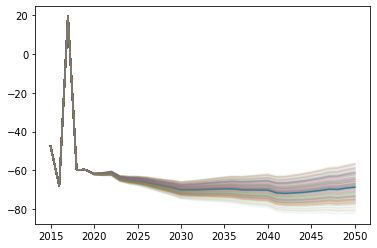

design_id: 1


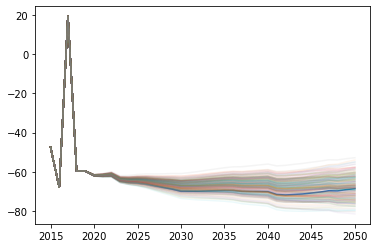

design_id: 2


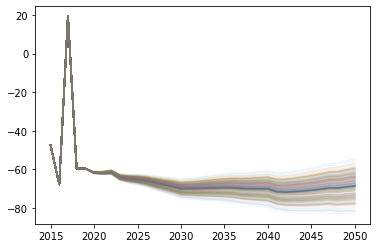

design_id: 3


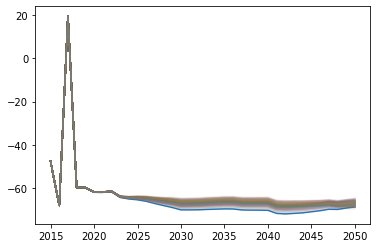

In [85]:
dict_ids = {}
dict_ids_base = {}
for d in list(df_attribute_master_id["design_id"].unique()):
    df_dtmp = df_attribute_master_id[(df_attribute_master_id["design_id"] == d) & (df_attribute_master_id["time_series_id"] == 0) & (df_attribute_master_id["strategy_id"] == 1)]
    #set of ids to used
    set_ids = set(df_dtmp["master_id"])
    dict_ids.update({d: set_ids})
    
    #base id
    b_id = int(df_dtmp[df_dtmp["future_id"] == 0]["master_id"])
    dict_ids_base.update({d: b_id})
    
field = "fo-emissions_total-mtco2e"

for d in list(df_attribute_master_id["design_id"].unique()):
    print("design_id: " + str(d))
    #set of ids to used
    df_tmp = df_an_out[df_an_out["master_id"].isin(dict_ids[d])][["master_id", "year", field]]
    
    #loop
    for m in list(df_tmp["master_id"].unique()):
        df_tmp2 = df_tmp[df_tmp["master_id"] == m]
        
        x = np.array(df_tmp2["year"])
        y = np.array(df_tmp2[field])
        
        if m == dict_ids_base[d]:
            a = 1
        else:
            a = 0.08
        
        plt.plot(x, y, alpha = a)
        
    plt.show()
    
    
    


In [2]:
##  MERGE IN ANALYTICA RUNS FOR SELECT SECTORS

arch_name = "Chile_sector_package_2021_02_10_design_id-2"
df_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_name)
df_py = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch_name)
df_attribute_master_id = sr.get_archive_run(sr.fp_csv_attribute_master, arch_name)

df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch_name)
df_ed = df_ed[df_ed["master_id"].isin(df_py["master_id"])]
#bring in both designs and reduce to 0
#df_ed = df_ed[df_ed["design_id"] == 0]


##  MERGE IN ANALYTICA RUNS FOR SELECT SECTORS

arch_name3 = "Chile_sector_package_2021_02_10_design_id-3"
df_an3 = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_name)
df_py3 = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch_name)
df_attribute_master_id3 = sr.get_archive_run(sr.fp_csv_attribute_master, arch_name)

df_ed3 = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch_name)
df_ed3 = df_ed3[df_ed3["master_id"].isin(df_py3["master_id"])]
#bring in both designs and reduce to 0
#df_ed = df_ed[df_ed["design_id"] == 0]

In [26]:
arch130 = "Chile_sector_package_2021_01_30_design_id-1"
arch210 = "Chile_sector_package_2021_02_10_design_id-2"
df_params_130 = sr.get_archive_run(sr.fp_csv_parameter_ranges, arch130)
df_params_210 = sr.get_archive_run(sr.fp_csv_parameter_ranges, arch210)
df_params = pd.read_csv(sr.fp_csv_parameter_ranges)

set_fix = set(df_params["parameter"]) - set(df_params_130["parameter"])
p_fix = list(set_fix & set(df_params_210["parameter"]))
p_fix.sort()
p_fix





In [52]:
df_params_130[df_params_130["sector"] == "Analytica_forestry"]["parameter"].unique()




array(['incertidumbre_demanda_productos_forestales',
       'incertidumbre_incendio_bn', 'incertidumbre_incendio_plantaciones',
       'incertidumbre_perdida_de_bosque_nativo',
       'incertidumbre_rendimiento_bn',
       'incertidumbre_rendimiento_plantacion',
       'incertidumbre_var_demanda_legna', 'medida_forestacion_bn',
       'medida_forestacion_plantaciones', 'medida_incendio_bosque_nativo',
       'medida_incendio_plantaciones_forestales', 'medida_plan_de_manejo',
       'medida_sustitucion_degradacion',
       'trajmax_incertidumbre_megaincendio',
       'trajmin_incertidumbre_megaincendio',
       'trajmix_incertidumbre_megaincendio'], dtype=object)

In [55]:
df_params_130[df_params_130["sector"] == "Analytica_agriculture"]["parameter"].unique()




array(['medida_biodigestores', 'medida_cambio_dieta_bovina',
       'medida_captura_c_suelos', 'medida_uso_eficiente_fertilizante',
       'precio_bovino', 'precio_cerdo', 'precio_leche', 'precio_maiz',
       'precio_pollo', 'precio_soya'], dtype=object)

In [48]:
params_ag = list(df_pr[df_pr["sector"] == "Analytica_agriculture"]["parameter"].unique())
params_ag.sort()
#get futures associated with these parameters
futs_ag = set(df_fut[df_fut["parameter"].isin(params_ag)]["future_id"]) | set({0})
mast_ag = set(df_mas[(df_mas["design_id"] == 0) & (df_mas["strategy_id"] == 1) & (df_mas["time_series_id"] == 0) & (df_mas["future_id"].isin(futs_ag))]["master_id"])

dfe1 = df_ed[(df_ed["master_id"].isin(mast_ag)) & (df_ed["year"].isin([2050]))][["master_id"] + [x for x in df_ed.columns if x in params_ag]].copy()
dfo1 = df_out_an[(df_out_an["master_id"].isin(mast_ag)) & (df_out_an["year"].isin([2050]))][["master_id"] + ["ag-emissions_total-mtco2e"]].copy()
dfm = pd.merge(dfe1, dfo1, how = "left", on = ["master_id"])
dfm = pd.merge(dfm, df_mas[["master_id", "future_id"]], how = "left", on = ["master_id"])
dfm = pd.merge(dfm, df_fut[["future_id", "parameter", "range_value"]], how = "left", on = ["future_id"])

dfm


NameError: name 'df_pr' is not defined

In [199]:
arch_tor = "Chile_sector_package_2021_02_20_design_id-1"
df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch_tor)
df_ed_sv = sr.get_archive_run(sr.fp_csv_experimental_design_msec_single_vals, arch_tor)
df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, arch_tor)
df_out_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_tor)
df_out_py = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch_tor)
df_pr = pd.read_csv(sr.fp_csv_parameter_ranges)
#df_out_pmr = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, arch_tor)

df_out_an = pd.read_csv(sr.fp_csv_output_multi_sector_analytica)
mas_ndcp = set(df_mas[df_mas["strategy_id"].isin([0])]["master_id"])
mas_fut = set(df_mas[(df_mas["design_id"].isin([0, 1])) & df_mas["strategy_id"].isin([0, 1]) & df_mas["future_id"].isin([0, 1])]["master_id"])



In [201]:
params = set(df_pr[df_pr["sector"] == "Analytica_ippu"]["parameter"])
dd = df_ed[(df_ed["year"] == 2019) & (df_ed["time_series_id"] == 0) & (df_ed["design_id"] == 0)][["master_id"] + list(params)]

for p in params:
    ll = set(dd[p])
    
    if len(ll) > 1:
        print("len of " + p + ": " + str(len(ll)))

len of tasa_fuga: 201


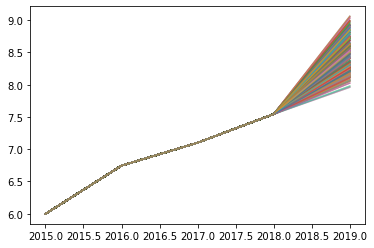

In [200]:
#df_out_py[df_out_py["year"].isin([2017])][["year"] + [x for x in df_out_py.columns if "emissions_total" in x]].drop_duplicates()
df_out_an = df_out_an.sort_values(by = ["master_id", "year"]).reset_index(drop = True)
sets_0 = set(df_mas[df_mas["future_id"] == 0]["master_id"])
sets_t0 = set(df_mas[df_mas["time_series_id"] == 0]["master_id"])
sets_t1 = set(df_mas[df_mas["time_series_id"] == 1]["master_id"])
field = "ip-emissions_total-mtco2e"
for m in list(df_out_an["master_id"].unique()):
    df_tmp = df_out_an[(df_out_an["master_id"] == m)&(df_out_an["master_id"].isin(sets_t0))]
    
    x = np.array(df_tmp["year"])[0:5]
    y = np.array(df_tmp[field])[0:5]
    
    if m in sets_0:
        a = 1
    else:
        a = 0.5
    
    plt.plot(x, y, alpha = a)

plt.show()
    
     
     

In [153]:

df_params = pd.read_csv(sr.fp_csv_parameter_ranges)
df_params_old = sr.get_archive_run(sr.fp_csv_parameter_ranges, "Chile_sector_package_2021_01_30_design_id-1")
secs = set({"Analytica_forestry", "Analytica_ippu"})

params_cq_now = set(df_params[df_params["sector"].isin(secs) & df_params["parameter_constant_q"].isin([1])]["parameter"])
params_cq_old = set(df_params_old[df_params_old["sector"].isin(secs) & df_params_old["parameter_constant_q"].isin([1])]["parameter"])

params_changed = (params_cq_now - params_cq_old) & set(df_params_old["parameter"])
params_new = params_cq_now - (params_cq_old | params_changed)


In [156]:
params_new

{'medida_algas_pardas',
 'medida_aumento_parques_reservas',
 'medida_forestacion_aumentada',
 'medida_manejo_aumentada',
 'medida_pmr_menos_papel'}

In [157]:
params_changed

{'incertidumbre_demanda_productos_forestales',
 'incertidumbre_incendio_bn',
 'incertidumbre_incendio_plantaciones',
 'incertidumbre_perdida_de_bosque_nativo',
 'incertidumbre_rendimiento_bn',
 'incertidumbre_rendimiento_plantacion'}

In [161]:
arch_tor = "Chile_sector_package_2021_01_30_design_id-1"
df_out_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_tor)
df_out_an[df_out_an["year"] == 2018][["master_id"] + [x for x in df_out_an.columns if "emissions_total" in x]]



,master_id,ag-emissions_total-mtco2e,fo-emissions_total-mtco2e,ip-emissions_total-mtco2e,wa-emissions_total-mtco2e
25731,0,11.020677,-59.630187,7.543825,5.577293
25735,1,11.020677,-59.630187,7.543825,5.577293
25739,2,11.020677,-59.630187,7.543825,5.577293
25743,3,11.020677,-59.630187,7.543825,5.577293
25747,4,11.020677,-59.630187,7.543825,5.577293
...,...,...,...,...,...
28927,799,11.020677,-59.630187,6.997627,5.577293
28931,800,11.020677,-59.630187,6.997627,5.577293
28935,801,11.020677,-59.630187,6.997627,5.577293
28939,802,11.020677,-59.630187,6.997627,5.577293


In [80]:
#df_ed[df_ed["year"].isin([2050])][["master_id"] + [x for x in df_ed.columns if "frac_private" in x]]
ed1 = set(df_ed.columns)


In [86]:
ed3 = set(df_ed.columns) - ign

In [87]:
ed3 - ed1

{'residential_retrofit_house',
 'steel_heat_biomass',
 'steel_heat_hydrogen',
 'trajgroup_8-lhs',
 'trajgroup_9-lhs',
 'transport_activity_bus',
 'transport_activity_private',
 'transport_activity_taxi',
 'transport_activity_truck',
 'transport_aviation_investment_cost_hydrogen',
 'transport_aviation_investment_cost_kerosene',
 'transport_frac_aviation_hydrogen',
 'transport_frac_aviation_kerosene',
 'transport_fuel_price_kerosene_aviation',
 'transport_intensity_aviation_hydrogen',
 'transport_investment_cost_modal_split_private_to_bus',
 'transport_investment_cost_modal_split_private_to_cycling',
 'transport_investment_cost_modal_split_private_to_train'}

#### df_tmp = df_out_an
tots = [x for x in df_tmp.columns if "emissions_total-mtco2e" in x]
tots = [x for x in df_tmp.columns if (x[0:3] == "fo-") and ("mtco2e" in x)]
df_tmp[df_tmp["year"].isin([2018])][["master_id"] + tots]



In [21]:
field = ["transport_frac_aviation_kerosene", "transport_frac_aviation_hydrogen", "nueva_cap_recuperacion", "copper_heat_diesel", "copper_heat_solar"]

fields = [(x + "_id") for x in ["master", "future", "strategy", "design"]] + field
df_ed[(df_ed["year"].isin([2050])) & (df_ed["master_id"].isin(mas_fut))][fields]



,master_id,future_id,strategy_id,design_id,transport_frac_aviation_kerosene,transport_frac_aviation_hydrogen,nueva_cap_recuperacion,copper_heat_diesel,copper_heat_solar
35,0,0,0,0,1.000000,0.000000,0.000000,0.283003,0.139974
71,1,1,0,0,1.000000,0.000000,0.000000,0.227621,0.195408
7271,804,0,0,1,1.000000,0.000000,0.000000,0.283003,0.139974
7307,805,1,0,1,1.000000,0.000000,0.000000,0.227621,0.195408
14507,201,0,1,0,0.900000,0.100000,2800.000000,0.123029,0.300000
14543,202,1,1,0,0.970374,0.029626,2151.924279,0.123029,0.300000
21743,1005,0,1,1,0.900000,0.100000,2800.000000,0.123029,0.300000
21779,1006,1,1,1,0.970374,0.029626,2151.924279,0.123029,0.300000
28979,402,0,0,0,1.000000,0.000000,0.000000,0.283003,0.139974
29015,403,1,0,0,1.000000,0.000000,0.000000,0.227621,0.195408


In [143]:
dfp = pd.read_csv(sr.fp_csv_parameter_ranges)
dfp0 = dfp[dfp["strategy_id"] == 0].copy()
dfp1 = dfp[dfp["strategy_id"] == 1].copy()
dfp1["strategy_id"] = dfp1["strategy_id"].replace({1: 0})

fields_merge = ["sector", "time_series_id", "strategy_id", "parameter"]
fields_data = ["normalize_group", "trajgroup_no_vary_q", "parameter_constant_q", "min_2050", "max_2050"] + [str(x) for x in range(2015, 2051)]

def compare_params(df_old, df_new, fields_merge, fields_data):
    
    dict_out = {}
    
    #get fields
    fields_dat_old = [x for x in fields_data if x in df_old.columns]
    fields_dat_new = [x for x in fields_data if x in df_new.columns]
    fields_dat_red = list(set(fields_dat_new) & set(fields_dat_old))
    fields_dat_red = [x for x in fields_data if x in fields_dat_red]

    #find fields that were dropped, if they exist
    fields_dat_compl_old = list(set(fields_data) - set(fields_dat_old))
    fields_dat_compl_new = list(set(fields_data) - set(fields_dat_new))
    
    if len(fields_dat_compl_old) > 0:
        #notify what fields were dropped
        fields_dat_compl_old.sort()
        sr.print_list_output(fields_dat_compl_old, "Dropping data fields from df_old")
        #add to output dictionary
        dict_out.update({"fields_dat_compl_old": fields_dat_compl_old})
        
    if len(fields_dat_compl_new) > 0:
        #notify what fields were dropped
        fields_dat_compl_new.sort()
        sr.print_list_output(fields_dat_compl_new, "Dropping data fields from df_new")
        #add to output dictionary
        dict_out.update({"fields_dat_compl_new": fields_dat_compl_new})
    
    #get intersection and order
    fm = list(set(df_old.columns) & set(df_new.columns) & set(fields_merge))
    fm = [x for x in fields_merge if x in fm]
    #notify of fields that are merged on
    sr.print_list_output(fm, "Merging on")
    
    #build dictionaries to rename
    dict_rnm_new = dict([[x, "newp_" + x] for x in fields_dat_new])
    dict_rnm_old = dict([[x, "oldp_" + x] for x in fields_dat_old])
    dict_out.update({"dict_rnm_new": dict_rnm_new, "dict_rnm_old": dict_rnm_old})
    #rename the data frames
    df_new = df_new[fm + fields_dat_new].rename(columns = dict_rnm_new)
    df_old = df_old[fm + fields_dat_old].rename(columns = dict_rnm_old)
    
    #merge
    df_comp = pd.merge(df_old, df_new, how = "inner", on = fm).sort_values(by = fm).reset_index(drop = True).fillna(0)
    dict_out.update({"df_comp": df_comp})

    #find parameters that were dropped, if they exist
    parameters_dat_compl_old = list(set(df_comp["parameter"]) - set(df_old["parameter"]))
    parameters_dat_compl_new = list(set(df_comp["parameter"]) - set(df_new["parameter"]))

    #notify
    if len(parameters_dat_compl_old) > 0:
        #notify what fields were dropped
        parameters_dat_compl_old.sort()
        sr.print_list_output(parameters_dat_compl_old, "The following parameters from df_old were not kept")
        #add to output dictionary
        dict_out.update({"parameters_dat_compl_old": parameters_dat_compl_old})

    if len(parameters_dat_compl_new) > 0:
        #notify what fields were dropped
        parameters_dat_compl_new.sort()
        sr.print_list_output(parameters_dat_compl_new, "The following parameters from df_new were not kept")
        #add to output dictionary
        dict_out.update({"parameters_dat_compl_new": parameters_dat_compl_new})

    #compare fields
    array_new = np.array(df_comp[[("newp_" + x) for x in fields_dat_red]])
    array_old = np.array(df_comp[[("oldp_" + x) for x in fields_dat_red]])
    array_diff = abs(array_new - array_old)

    params_diff = set({})
    #find differences
    for i in range(len(array_diff)):
        w = np.where(array_diff[i] > 0.0001)[0]
        if len(w) > 0:
            #get parameter
            param = df_comp["parameter"].iloc[i]
            #add to output set
            params_diff = params_diff | set({param})

    dict_out.update({"params_diff": params_diff})
    
    return dict_out
    

dict_check = compare_params(dfp0, dfp1, fields_merge, fields_data)

set_acciones = set(dfp[dfp["type"] == "accion"]["parameter"])
dict_check["params_diff"] - set_acciones





##############################
Merging on:
	sector
	time_series_id
	strategy_id
	parameter
##############################





{'pulp_efficiency_heat_solar',
 'steel_intensity_reference',
 'transport_modal_split_private_to_bus',
 'transport_modal_split_private_to_cycling',
 'transport_modal_split_private_to_telework'}

In [26]:
#hotel dresser
print("hotel:")
x1 = 65*21*20/1728
print(x1)
print(x1/40)

#
print("pair of dressers:")
x2 = 30*31.75*23/1728
print(x2)
print(2*x2/75)

#
print("pair of dressers:")
x3 = 17*51*36/1728
print(x3)
print(x3/75)



hotel:
15.79861111111111
0.3949652777777778
pair of dressers:
12.67795138888889
0.3380787037037037
pair of dressers:
18.0625
0.24083333333333334


In [110]:
mas_ndcp = set(df_mas[df_mas["strategy_id"].isin([0])]["master_id"])

df_tmp = df_out_py
fields_tot = [x for x in df_tmp.columns if "emissions_total" in x]
df_tmp2 = df_tmp[(df_tmp["master_id"].isin(mas_ndcp)) & (df_tmp["year"].isin([2018]))][["master_id"] + fields_tot]

for field in fields_tot:
    print("-"*39)
    print(field)
    print(set([round(x, 2) for x in df_tmp2[field]]))



---------------------------------------
co-emissions_total-mtco2e
{2.5}
---------------------------------------
im-emissions_total-mtco2e
{17.45}
---------------------------------------
pu-emissions_total-mtco2e
{0.13}
---------------------------------------
re-emissions_total-mtco2e
{4.36}
---------------------------------------
tx-emissions_total-mtco2e
{26.86, 26.85}


In [109]:
params_check = ["medida_sustitucion_degradacion", "medida_forestacion_plantaciones"]
df_fc = df_fut[df_fut["parameter"].isin(params_check)]
check_fut = set(df_fc["future_id"])
df_mc = df_mas[(df_mas["future_id"].isin(check_fut)) & (df_mas["master_id"].isin(df_out_an["master_id"]))]
check_mas = set(df_mc["master_id"])
df_ed[(df_ed["master_id"].isin(check_mas)) & (df_ed["year"].isin([2050]))][["master_id"] + [x for x in df_ed.columns if (x in params_check)]]



TypeError: 'NoneType' object is not subscriptable

In [16]:
df_out_an[(df_out_an["master_id"].isin(check_mas)) & (df_out_an["year"].isin([2050]))][["master_id"] + [x for x in df_out_an.columns if (x[0:3] == "fo-")]]


,master_id,fo-aov-capex-mmusd,fo-aov-4a_forestal-mtco2e,fo-aov-4b_cultivo-mtco2e,fo-aov-4c_pastizal-mtco2e,fo-aov-4d_humedal-mtco2e,fo-aov-4e_asentamientos-mtco2e,fo-aov-4f_otras_tierras-mtco2e,fo-aov-incendios-mtco2e,fo-aov-opex-mmusd,fo-aov-parques_reservas-ha,fo-aov-plan_manejo-ha,fo-aov-plantaciones-ha,fo-aov-renovales-ha,fo-area_total-ha,fo-costs_total-mmusd,fo-emissions_total-mtco2e
3391,402,0.000599,-83.978936,1.465027,0.037079,0.014993,0.358030,-0.017409,4.021386,0.000298,1.871114e+06,1.240753e+06,2.621044e+06,4.544760e+06,1.027767e+07,0.000897,-78.099829
3423,403,0.000599,-85.697186,1.465027,0.037079,0.014993,0.358030,-0.017409,4.021386,0.000298,1.871114e+06,1.240753e+06,2.621044e+06,4.544760e+06,1.027767e+07,0.000897,-79.818078
3647,410,0.000599,-83.997641,1.452802,-0.025049,0.014365,0.355744,-0.029650,4.021386,0.000298,1.871114e+06,1.240753e+06,2.621044e+06,4.544760e+06,1.027767e+07,0.000897,-78.208044
3679,411,0.000599,-84.327115,1.501702,0.223465,0.016880,0.364890,0.019314,4.021386,0.000297,1.871114e+06,1.240753e+06,2.621044e+06,4.544760e+06,1.027767e+07,0.000896,-78.179478


In [54]:
df_ed_out["gr_pib"]

0        0.017111
1        0.017111
2        0.011886
3        0.039493
4        0.010544
           ...   
57883    0.024479
57884    0.024033
57885    0.023597
57886    0.023169
57887    0.022749
Name: gr_pib, Length: 57888, dtype: float64

In [12]:
max(df_ed_out[(df_ed_out["year"] == 2050) & (df_ed_out["design_id"] == 1)]["pib"])



675.1784663928714

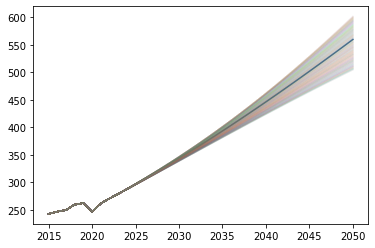

In [57]:
fields_examine = ["pib", "poblacion"]
df1 = df_ed_out[(df_ed_out["design_id"] == 1) & (df_ed_out["time_series_id"] == 0) & (df_ed_out["strategy_id"] == 1)]#[["master_id"] + fields_examine]

mas = list(df1["master_id"].unique())

for m in mas:
    
    dft = df1[df1["master_id"] == m]
    x = np.array(dft["year"])
    y = np.array(dft["pib"])
    
    if m == 1005:
        a = 1
    else:
        a = 0.05
    
    plt.plot(x, y, alpha = a)
    
plt.show()

In [61]:
max(df1[df1["year"] == 2050]["pib"])

601.9354499098257

In [41]:
pob = int(df1["poblacion"].iloc[0])
pib = int(df1["pib"].iloc[0])

In [46]:
min(df1["pib"])/pib

0.9022268899390369

In [32]:

all_params = list(set(df_pr["parameter"]))
all_params_tm = [x for x in all_params if "trajmix" in x]
params_trajmix = []

for x in all_params_tm:
    
    if "-" in x:
        x = x.split("-")[1]
    
    params_trajmix.append(x.replace("trajmix_", ""))


In [43]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)

In [34]:
arch_all = "Chile_sector_package_2021_01_30_final"
df_prim = sr.get_archive_run(sr.fp_csv_prim_input_data.replace(".csv", "_design_id-1.csv"), arch_all)


In [39]:
arch_d1 = "Chile_sector_package_2021_01_30_design_id-1"
df_lhs = sr.get_archive_run(sr.fp_csv_lhs_table_multi_sector, arch_d1)




In [41]:
df_lhs[[x for x in df_lhs.columns if ("trajgroup" in x) and ("trajgroup")]]

,trajgroup_1-lhs,trajgroup_1-trajmax_copper_heat_diesel,trajgroup_1-trajmax_copper_heat_solar,trajgroup_1-trajmin_copper_heat_diesel,trajgroup_1-trajmin_copper_heat_solar,trajgroup_1-trajmix_copper_heat_diesel,trajgroup_1-trajmix_copper_heat_solar,trajgroup_2-lhs,trajgroup_2-trajmax_copper_open_pit_mine_diesel,trajgroup_2-trajmax_copper_open_pit_mine_electricitiy,...,trajgroup_6-trajmix_transport_frac_private_electric,trajgroup_6-trajmix_transport_frac_private_gasoline,trajgroup_6-trajmix_transport_frac_private_hyb,trajgroup_7-lhs,trajgroup_7-trajmax_transport_frac_truck_diesel,trajgroup_7-trajmax_transport_frac_truck_hydrogen,trajgroup_7-trajmin_transport_frac_truck_diesel,trajgroup_7-trajmin_transport_frac_truck_hydrogen,trajgroup_7-trajmix_transport_frac_truck_diesel,trajgroup_7-trajmix_transport_frac_truck_hydrogen
0,0.485770,0.977801,0.357776,0.818550,0.936624,0.551432,0.637682,0.565256,0.038377,0.946783,...,0.276551,0.925093,0.199338,0.229756,0.335704,0.550595,0.472805,0.793048,0.155635,0.112315
1,0.411031,0.755180,0.237562,0.156227,0.929556,0.245165,0.595448,0.458320,0.800346,0.938967,...,0.398746,0.934718,0.032574,0.371847,0.123336,0.453092,0.777633,0.261984,0.291836,0.538509
2,0.808543,0.666354,0.368444,0.171757,0.244714,0.169000,0.900776,0.197071,0.170923,0.748495,...,0.541340,0.704535,0.016904,0.701036,0.610254,0.807567,0.042673,0.617204,0.467909,0.684333
3,0.137164,0.279563,0.985121,0.677356,0.308748,0.322033,0.910091,0.908188,0.950908,0.943414,...,0.735542,0.990644,0.159860,0.140302,0.636807,0.055678,0.125456,0.393114,0.944857,0.903527
4,0.573853,0.100075,0.126307,0.653166,0.191518,0.418508,0.711461,0.645474,0.499741,0.081992,...,0.949977,0.289684,0.342353,0.533516,0.647132,0.495466,0.366168,0.505487,0.720012,0.576881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.893442,0.851150,0.241057,0.740359,0.608771,0.557137,0.683364,0.607316,0.907960,0.456333,...,0.302559,0.524937,0.400318,0.885569,0.149254,0.472448,0.855851,0.007148,0.575076,0.198139
196,0.146834,0.598795,0.616855,0.071965,0.039809,0.510335,0.399196,0.793566,0.624260,0.062070,...,0.888415,0.665751,0.102759,0.965437,0.028100,0.215025,0.956718,0.424307,0.218703,0.132111
197,0.708582,0.860055,0.140318,0.442250,0.203667,0.034646,0.187443,0.214285,0.889228,0.157056,...,0.422245,0.186862,0.515930,0.203098,0.464633,0.707419,0.700567,0.834434,0.052031,0.915727
198,0.658681,0.222066,0.038949,0.572993,0.044474,0.682669,0.344280,0.139038,0.663390,0.538651,...,0.019779,0.847310,0.668721,0.750551,0.234597,0.240722,0.339808,0.774580,0.222802,0.942663


In [8]:
df_params = pd.read_csv(sr.fp_csv_parameter_ranges)
df_params_add = pd.read_csv(os.path.join(sr.dir_ref, "ndc_plus_to_integrate", "parameter_ranges_carlos_ndc+.csv"))


In [32]:
#df_params_add[(df_params_add["strategy_id"].isin([0, 1])) & (df_params_add["time_series_id"].isin([0, 1]))][~df_params_add["parameter"].isin(df_params["parameter"])].to_csv("/Users/jsyme/Desktop/prange.csv", index = None, encoding = "UTF_8")
df_ed_sv = pd.read_csv(sr.fp_csv_experimental_design_msec_single_vals)


In [14]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)
df_ed_sv = pd.read_csv(sr.fp_csv_experimental_design_msec_single_vals)

In [40]:
#df_ed[(df_ed["year"] == 2050)]["steel_efficiency_heat_biomass"]
list(df_ed_sv.columns).count("steel_efficiency_heat_biomass")

1

In [15]:
set([x for x in df_params_add["parameter"] if "trajgroup_8" in x])

{'trajgroup_8-lhs',
 'trajgroup_8-trajmax_steel_heat_biomass',
 'trajgroup_8-trajmax_steel_heat_coal',
 'trajgroup_8-trajmax_steel_heat_coke',
 'trajgroup_8-trajmax_steel_heat_hydrogen',
 'trajgroup_8-trajmin_steel_heat_biomass',
 'trajgroup_8-trajmin_steel_heat_coal',
 'trajgroup_8-trajmin_steel_heat_coke',
 'trajgroup_8-trajmin_steel_heat_hydrogen',
 'trajgroup_8-trajmix_steel_heat_biomass',
 'trajgroup_8-trajmix_steel_heat_coal',
 'trajgroup_8-trajmix_steel_heat_coke',
 'trajgroup_8-trajmix_steel_heat_hydrogen'}

In [41]:
steel_production = np.array(df_ed["steel_production"])
steel_intensity = np.array(df_ed["steel_intensity"])
steel_heat_biomass = np.array(df_ed["steel_heat_biomass"])
steel_share_heat = np.array(df_ed["steel_share_heat"])
steel_efficiency_heat_biomass = np.array(df_ed_sv["steel_efficiency_heat_biomass"])

steel_production * steel_intensity * steel_share_heat * steel_heat_biomass / steel_efficiency_heat_biomass



array([  0.        ,   0.        ,   0.        , ..., 314.09736639,
       311.87653832, 309.31609299])

In [66]:
fns = ["REAL", "DESIGN_ID_0", "DESIGN_ID_2", "DESIGN_ID_3"]

fields_sort = ["sector", "type", "parameter", "time_series_id", "strategy_id"]

for fn in fns:
    fr = os.path.join(sr.dir_ref, "parameter_ranges_" + fn + ".csv")
    df_tmp = pd.read_csv(fr)
    
    #get traj groups
    ap = list(set(df_tmp["parameter"]))
    ap.sort()
    #get all trajgroup parameters
    tgps = [x.split("-")[1].replace("trajmix_", "") for x in ap if ("trajmix" in x) and ("trajgroup" in x) and ("lhs" not in x)]
    tgps_drop = [x for x in tgps if (x in list(df_tmp["parameter"]))]
    #drop any that are designated in the file
    df_tmp = df_tmp[~df_tmp["parameter"].isin(tgps_drop)].sort_values(by = fields_sort).reset_index(drop = True)
    
    #write cleaned output
    df_tmp.to_csv(fr, index = None, encoding = "UTF-8")
    

In [61]:
df_tmp.shape

(3420, 46)

In [64]:
[[x for x in tgps if x in list(df_tmp["parameter"])]]

[]

In [118]:
df_params = pd.read_csv(sr.fp_csv_parameter_ranges)
all_params = list(set(df_params["parameter"]))
checkr = [x for x in list(all_params) if list(df_params["parameter"]).count(x) < 4]
print_set = list(set(df_params[df_params["sector"] == "Analytica_agriculture"]["parameter"]))
print_set.sort()
sr.print_list_output(print_set, "ag")
print(len(print_set))




##############################
ag:
	manejo_holistico_de_gando
	medida_biodigestores
	medida_cambio_dieta_bovina
	medida_cambio_dieta_nacional
	medida_captura_c_suelos
	medida_uso_eficiente_fertilizante
	precio_bovino
	precio_cerdo
	precio_leche
	precio_maiz
	precio_pollo
	precio_soya
##############################



12


In [109]:
checkr = [x for x in list(all_params) if list(df_params["parameter"]).count(x) > 4]

In [119]:
params_tm = [x for x in all_params if "trajmix" in x]
ptm = []
for p in params_tm:
    p2 = p.split("-")
    if len(p2) > 1:
        p2 = p2[1]
    else:
        p2 = p2[0]
    
    p2 = p2.replace("trajmix_", "")
    ptm.append(p2)
ptm.sort()

params_rmv = set([x for x in ptm if x in all_params])

#df_params = df_params[~df_params["parameter"].isin(params_rmv)]

In [113]:
df_params.to_csv(sr.fp_csv_parameter_ranges, index = None, encoding = "UTF-8")

In [120]:
params_rmv

set()